In [1]:
import numpy as np 
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.io as sio
import scipy
import datetime as dt
import plotly
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation
import math
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
from scipy.stats import ks_2samp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random
from itertools import combinations
print('done importing')

done importing


In [2]:
April_df = pd.read_excel(
    'PGNintracellular_results_longFormat.xlsx'
)

April_df = April_df.replace(np.nan,0)
April_df

,ExpDate,ExpID,Treatment,hyp_pulse,holding_potential,step,f_AHP,halfWidth_duration,Input_R_step,Num_APs,...,StdError_peakAmplitude,Instantaneous_freq_Aps,Freq_APs,Sweep,RMP,Capacitance,Input_R_cell,rheobase,Thresh_Voltage_manuallySelected,Unnamed: 20
0,2020-12-22,1,control,y,-71.9764,0.0,0.0000,0.00,2476.7141,0,...,0.0000,0.0000,0.0,1,-45,23.0,1647.0,15.0,-38.07525,-39.09323
1,2020-12-22,1,control,y,-70.4985,5.0,0.0000,0.00,1967.5433,0,...,0.0000,0.0000,0.0,1,-45,23.0,1647.0,0.0,0.00000,0.00000
2,2020-12-22,1,control,y,-59.9119,10.0,0.0000,0.00,1203.5922,0,...,0.0000,0.0000,0.0,1,-45,23.0,1647.0,0.0,0.00000,0.00000
3,2020-12-22,1,control,y,-61.0678,15.0,42.5312,3.20,2828.8026,1,...,0.0000,0.0000,2.0,1,-45,23.0,1647.0,0.0,0.00000,0.00000
4,2020-12-22,1,control,y,-56.4700,20.0,15.0500,3.52,422.2896,5,...,1.3224,10.1911,10.0,1,-45,23.0,1647.0,0.0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,2021-05-13,17,hex,y,-73.2918,50.0,0.0000,0.00,131.3614,0,...,0.0000,0.0000,0.0,3,-43,39.6,203.0,0.0,0.00000,0.00000
1316,2021-05-13,17,hex,y,-72.1842,55.0,0.0000,0.00,206.4109,0,...,0.0000,0.0000,0.0,3,-43,39.6,203.0,0.0,0.00000,0.00000
1317,2021-05-13,17,hex,y,-73.2424,60.0,0.0000,0.00,159.1739,0,...,0.0000,0.0000,0.0,3,-43,39.6,203.0,0.0,0.00000,0.00000
1318,2021-05-13,17,hex,y,-72.7819,65.0,0.0000,0.00,210.7766,0,...,0.0000,0.0000,0.0,3,-43,39.6,203.0,0.0,0.00000,0.00000


# Here you can run log regression and get just one bal accuracy score:

1275

In [104]:

Features = []
Labels = []
for a in np.arange(0,(len(April_df)/15)-1):
    ind_start = int(a*15)
    ind_stop = int((a+1)*15)
    
    Labels.append(April_df.iloc[ind_start].Treatment)
    
    if ind_start == 0:
        Features = April_df.iloc[ind_start:ind_stop]['Freq_APs'].to_numpy()
    else:
        Features = np.vstack((
            Features, April_df.iloc[ind_start:ind_stop]['Freq_APs'].to_numpy()))

X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.25)
logreg = LogisticRegression(class_weight='balanced')
logreg = logreg.fit(X_train, y_train)
TestLPred = logreg.predict(X_test)

print(sklearn.metrics.balanced_accuracy_score(TestLPred, y_test))

0.8166666666666667


C:\Users\april\.anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# And here is where you can withhold different samples for your test set and get an average +/- SEM for accuracy:

In [107]:
Features = []
Labels = []
for a in np.arange(0,(len(April_df)/15)-1):
    ind_start = int(a*15)
    ind_stop = int((a+1)*15)
    
    Labels.append(April_df.iloc[ind_start].Treatment)
    
    if ind_start == 0:
        Features = April_df.iloc[ind_start:ind_stop]['Freq_APs'].to_numpy()
    else:
        Features = np.vstack((Features, April_df.iloc[ind_start:ind_stop]['Freq_APs'].to_numpy()))
        
    
Features = Features[0:67]
Labels = April_df['Treatment'].to_numpy().reshape(-1,1)

list_treatments = []
list_controls = []
list_hexs = []
count = 0

for i in np.arange(0,len(April_df),15):
    if April_df.iloc[i].Treatment == 'control':
        list_controls.append(count)
    elif April_df.iloc[i].Treatment == 'hex':
        list_hexs.append(count)
    else:
        print('oh oh')
    count += 1
        
    list_treatments.append(April_df.iloc[i].Treatment)

bal_accuracies = []
for ii in np.arange(0,29):
    these_two = [list_controls[ii], list_hexs[ii]]

    X_test = np.vstack((Features[these_two[0]], Features[these_two[1]]))
    y_test = np.vstack((Labels[these_two[0]], Labels[these_two[1]]))

    new_feats = []
    new_labels = []
    for i in range(len(Features)):
        if i not in these_two:
            new_feats.append(Features[i])
            new_labels.append(Labels[i])
        else:
            continue

    X_train = new_feats
    y_train = new_labels

    #X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.25)

    logreg = LogisticRegression(class_weight='balanced')
    logreg = logreg.fit(X_train, y_train)
    TestLPred = logreg.predict(X_test)

    bal_accuracies.append(sklearn.metrics.balanced_accuracy_score(TestLPred, y_test))
    
    
############################# NOW FOR SHUFFLED ##########################################

April_df['Shuffled_Treatment'] = April_df.sample(frac = 1).reset_index()['Treatment']

Features_shuffled = []
Labels_shuffled = []
for a in np.arange(0,(len(April_df)/15)-1):
    ind_start = int(a*15)
    ind_stop = int((a+1)*15)
    
    Labels_shuffled.append(April_df.iloc[ind_start].Shuffled_Treatment)
    
    if ind_start == 0:
        Features_shuffled = April_df.iloc[ind_start:ind_stop]['Freq_APs'].to_numpy()
    else:
        Features_shuffled = np.vstack((Features_shuffled, April_df.iloc[ind_start:ind_stop]['Freq_APs'].to_numpy()))
        
    
Features_shuffled = Features_shuffled[0:67]
#Labels = April_df['Treatment'].to_numpy().reshape(-1,1)


list_controls = []
list_hexs = []
count = 0

for i in np.arange(0,len(April_df),15):
    if April_df.iloc[i].Treatment == 'control':
        list_controls.append(count)
    elif April_df.iloc[i].Treatment == 'hex':
        list_hexs.append(count)
    else:
        print('oh oh')
    count += 1
    
    shuff_controls = []
    for z in np.arange(0,len(list_controls)):
        shuff_controls.append(random.choice(np.arange(0,67)))

    shuff_hexs = []
    for z in np.arange(0,len(list_hexs)):
        shuff_hexs.append(random.choice(np.arange(0,67)))

        
bal_accuracies_shuffled = []
for ii in np.arange(0,29):
    these_two = [shuff_controls[ii], shuff_hexs[ii]]

    X_test = np.vstack((Features_shuffled[these_two[0]], Features_shuffled[these_two[1]]))
    y_test = np.vstack((Labels_shuffled[these_two[0]], Labels_shuffled[these_two[1]]))

    new_feats = []
    new_labels = []
    for i in range(len(Features_shuffled)):
        if i not in these_two:
            new_feats.append(Features_shuffled[i])
            new_labels.append(Labels_shuffled[i])
        else:
            continue

    X_train = new_feats
    y_train = new_labels

    #X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.25)

    logreg = LogisticRegression(class_weight='balanced')
    logreg = logreg.fit(X_train, y_train)
    TestLPred = logreg.predict(X_test)

    bal_accuracies_shuffled.append(sklearn.metrics.balanced_accuracy_score(TestLPred, y_test))





C:\Users\april\.anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'control'

In [8]:
bal_accuracies = np.load('balanced_accuracies_real.npy')
bal_accuracies_shuffled = np.load('balanced_accuracies_shuffled.npy')

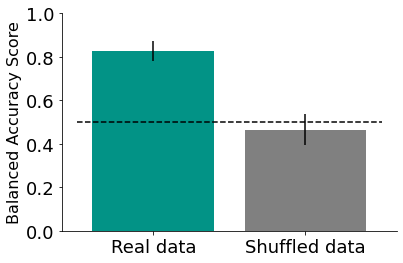

In [28]:
plt.bar(0,np.mean(bal_accuracies), color = sns.xkcd_rgb['teal'])
plt.errorbar(0,np.mean(bal_accuracies), scipy.stats.sem(bal_accuracies), color = 'black')

plt.bar(1,np.mean(bal_accuracies_shuffled), color = 'gray')
plt.errorbar(1,np.mean(bal_accuracies_shuffled), scipy.stats.sem(bal_accuracies_shuffled), color = 'black')

plt.hlines(.5,-.5,1.5, color = 'black', linestyles = '--')

plt.ylim([0,1])
plt.yticks(fontsize=18)
plt.xticks([0,1], ['Real data', 'Shuffled data'], fontsize=18)

plt.ylabel('Balanced Accuracy Score', fontsize=16)

sns.despine()
plt.savefig('logReg_accuracyTest.svg', format='svg', dpi=1200)

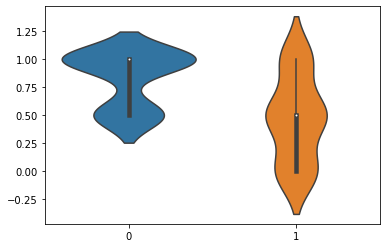

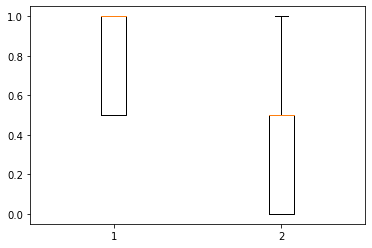

In [17]:
sns.violinplot(data = [bal_accuracies, bal_accuracies_shuffled])

fig4, ax4 = plt.subplots()
data = [bal_accuracies, bal_accuracies_shuffled]
ax4.boxplot(data)
plt.show()

# Stats to compare real data vs. random chance (0.5)

In [162]:
scipy.stats.ttest_1samp(bal_accuracies,.5)

Ttest_1sampResult(statistic=7.293833011524188, pvalue=6.101031068870191e-08)

# Stats to compare shuffled data vs. random chance (0.5)

In [169]:
scipy.stats.ttest_1samp(bal_accuracies_shuffled,.5)

Ttest_1sampResult(statistic=-0.7691224192380871, pvalue=0.44826031678405576)

# Stats to compare real data vs. shuffled data

In [166]:
scipy.stats.ttest_ind(bal_accuracies,bal_accuracies_shuffled)

Ttest_indResult(statistic=4.69041575982343, pvalue=1.7946857003954775e-05)